In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
import vaderSentiment

In [3]:
data = pd.read_csv('book_reviews_sample.csv')

In [4]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3.0
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4.0
2,1463,Good thing that this is a free story. I read i...,1.0
3,"10342,""Action, action, action! Equipment keeps...",NaN,NaN
4,5256,this was hands down the worse book i have ever...,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       100 non-null    object 
 1   reviewText  81 non-null     object 
 2   rating      81 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [6]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [7]:
data['reviewText_clean'] = data.apply(
    lambda x: re.sub(r"([^\w\s])", " ", x['reviewText'].lower()) if isinstance(x['reviewText'], str) else x['reviewText'], axis=1)

In [8]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3.0,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4.0,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1.0,good thing that this is a free story i read i...
3,"10342,""Action, action, action! Equipment keeps...",NaN,NaN,NaN
4,5256,this was hands down the worse book i have ever...,1.0,this was hands down the worse book i have ever...


In [9]:
vader_sentiment = SentimentIntensityAnalyzer()

In [10]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(
    lambda review: vader_sentiment.polarity_scores(review)['compound'] if isinstance(review, str) else None
)

In [11]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3.0,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4.0,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1.0,good thing that this is a free story i read i...,0.6740
3,"10342,""Action, action, action! Equipment keeps...",NaN,NaN,NaN,NaN
4,5256,this was hands down the worse book i have ever...,1.0,this was hands down the worse book i have ever...,-0.4767


In [12]:
bins = [-1, -0.1, 0.1, 1]
names = ['megative', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

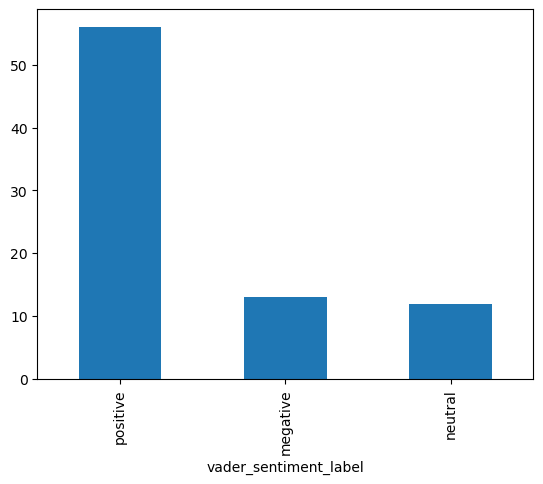

In [13]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [29]:
transformer_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')


In [35]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    if isinstance(review, str): 
        sentiment_list = transformer_pipeline(review)
        sentiment_label = [sent['label'] for sent in sentiment_list]
        transformer_labels.append(sentiment_label)
    else:
        transformer_labels.append(None)

In [39]:
data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

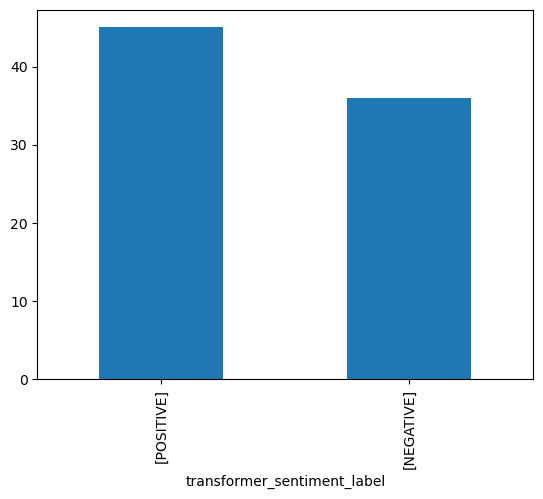

In [41]:
data['transformer_sentiment_label'].value_counts().plot.bar()